In [9]:

# import packages
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [11]:
# loading the csv file
df = pd.read_csv('esb_day_level.csv')
df.head(2)

,vehicle_day_id,Region,Fleet,Vehicle ID,Date,dist,runtime,idling_time,idling_mins,driving_time,SOC,energy,temp,tdiff,over65,ptemp,speed,Efficiency,Heater,elec_heat,region_NC,region_SC,region_RM
0,4,NC,NC1 Lion,EV053,9/24/2021,6.265156,0.566389,0.001667,0.100000,0.564722,16.008713,33.618298,99.248,34.248,1,34.248,11.089115,5.365916,electric,1,1,0,0
1,5,NC,NC1 Lion,EV053,11/26/2021,19.925346,1.511944,0.101111,6.066667,1.410833,71.075314,149.258159,45.842,-19.158,0,0,9.504779,7.490869,electric,1,1,0,0


# Motivating question -> how does idling time (in minutes) affect battery charge level?

In [3]:
### 5 Regressions Being Done
#1 - 5 independent variables
#2 - piecewise regression
#3 - dummy variable for temp over 65
#4 - regional dummy variables r^2 = 0.8
#5 - electric heater dummy variable r^2 = 0.8

# Scatter Plots of Distance vs Total Energy

<AxesSubplot:title={'center':'Distance vs Energy'}, xlabel='dist', ylabel='energy'>

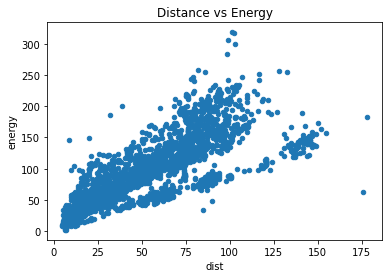

In [13]:
df.plot(kind='scatter', x = 'dist', y = 'energy', title = 'Distance vs Energy')

In [ ]:
df.plot(kind='scatter', x = 'idling_min', y = 'energy', title = 'Distance vs Energy')

# Scatter Plots of Idling Energy vs Total Energy

<AxesSubplot:title={'center':' Raw Data Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

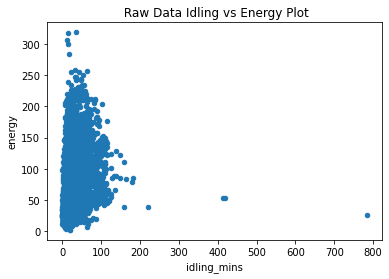

In [60]:
df.plot(kind='scatter', x = 'idling_mins', y = 'energy', title =' Raw Data Idling vs Energy Plot')

# Scatter Plots of Idling Energy vs Energy for Great Lakes

<AxesSubplot:title={'center':' Great Lakes Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

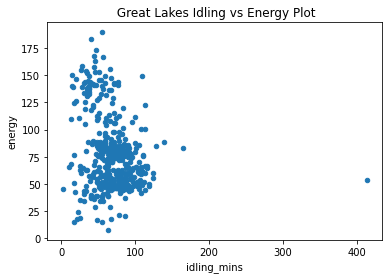

In [63]:
df_GL = df.loc[df['Region'] == 'GL']
df_GL.plot(kind='scatter', x = 'idling_mins', y = 'energy', title =' Great Lakes Idling vs Energy Plot')

<AxesSubplot:title={'center':'Rocky Mountain Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

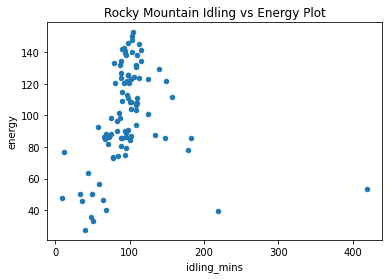

In [64]:
df_RM = df.loc[df['Region'] == 'RM']
df_RM.plot(kind='scatter', x = 'idling_mins', y = 'energy', title ='Rocky Mountain Idling vs Energy Plot')

<AxesSubplot:title={'center':'Rocky Mountain + Great Lakes Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

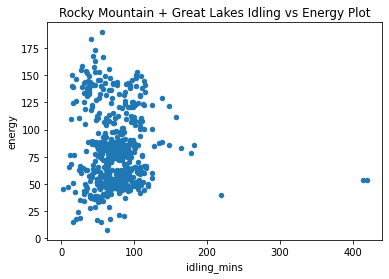

In [68]:
df_GLRM= df.loc[(df['Region'] == 'RM') | (df['Region'] == 'GL')]
df_GLRM.plot(kind='scatter', x = 'idling_mins', y = 'energy', title ='Rocky Mountain + Great Lakes Idling vs Energy Plot')

<AxesSubplot:title={'center':'Temp Over 65 Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

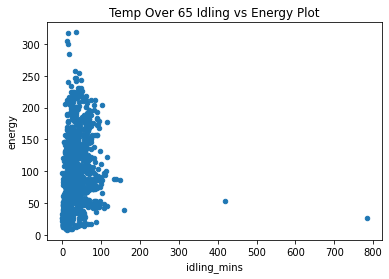

In [72]:
df_over65 = df.loc[df['temp'] >= 65]
df_over65.plot(kind='scatter', x = 'idling_mins', y = 'energy', title ='Temp Over 65 Idling vs Energy Plot')

<AxesSubplot:title={'center':'Temp Under 65 Idling vs Energy Plot'}, xlabel='idling_mins', ylabel='energy'>

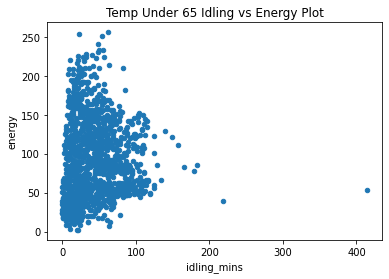

In [71]:
df_under65 = df.loc[df['temp'] < 65]
df_under65.plot(kind='scatter', x = 'idling_mins', y = 'energy', title ='Temp Under 65 Idling vs Energy Plot')

In [54]:
#plt.hist(df['idling_mins'], bins=100)
#plt.show()

# Regression #1

In [ ]:
# Piecewise Regression - using 5 independent variables
model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp + ptemp', data=df).fit()
model.save("pickle_files/esb_ptemp_model.pickle")

/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

In [7]:
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     6.981
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          2.75e-230
Time:                        16:02:22   Log-Likelihood:                -10775.
No. Observations:                2375   AIC:                         2.351e+04
Df Residuals:                    1394   BIC:                         2.917e+04
Df Model:                         980                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -69.5689 

# Regression #2

In [50]:
# Regression with Temperature
model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:00:02   Log-Likelihood:                -11633.
No. Observations:                2375   AIC:                         2.328e+04
Df Residuals:                    2370   BIC:                         2.331e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -36.8743      3.848     -9.582      

# Regression #3

In [27]:
# Replaced temperature variable with dummy variable for over 65F
model = smf.ols(formula='energy ~ dist + idling_mins + speed + over65', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1086.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:58:27   Log-Likelihood:                -12678.
No. Observations:                2581   AIC:                         2.537e+04
Df Residuals:                    2576   BIC:                         2.540e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2181      2.499      0.487      

# Regression #4

In [16]:
# Replaced temperature with regional dummy variables
model = smf.ols(formula='energy ~ dist + idling_mins + speed + region_NC + region_SC + region_RM', data=df).fit()
model.save("pickle_files/esb_regional_model.pickle")
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1896.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:07:20   Log-Likelihood:                -11772.
No. Observations:                2581   AIC:                         2.356e+04
Df Residuals:                    2574   BIC:                         2.360e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -53.2121      2.355    -22.593      

/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/basillatif/.pyenv/versions/3.10.0/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

# Regression #5

In [29]:
# Replaced regional dummy variables with electric heater dummy variable
model = smf.ols(formula='energy ~ dist + idling_mins + speed + elec_heat', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2656.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:58:27   Log-Likelihood:                -11845.
No. Observations:                2581   AIC:                         2.370e+04
Df Residuals:                    2576   BIC:                         2.373e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -49.8311      2.087    -23.874      

# Regression #6

In [58]:
# Regression using only GL region
df_GL = df.loc[df['Region'] == 'GL']
#df_GL.head()
model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp', data=df_GL).fit()
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2091.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          7.04e-294
Time:                        13:44:33   Log-Likelihood:                -1607.1
No. Observations:                 466   AIC:                             3224.
Df Residuals:                     461   BIC:                             3245.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.3009      2.309      9.660      

# Regression #7

In [31]:
# Regression using only RM region

df_RM = df.loc[df['Region'] == 'RM']
df_RM.head()

model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp', data=df_RM).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           5.35e-45
Time:                        08:58:27   Log-Likelihood:                -339.09
No. Observations:                  93   AIC:                             688.2
Df Residuals:                      88   BIC:                             700.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      47.9446      6.326      7.580      

In [65]:
df_GLRM=df.loc[(df['Region'] == 'RM') | (df['Region'] == 'GL')]
df_GLRM.head()

,vehicle_day_id,Region,Fleet,Vehicle ID,Date,dist,runtime,idling_time,idling_mins,driving_time,...,tdiff,over65,ptemp,speed,Efficiency,Heater,elec_heat,region_NC,region_SC,region_RM
2020,2081,RM,RM,EV146,5/16/2022,30.944285,1.997299,0.807447,48.446833,1.189851,...,-0.06,0,0,12.638992,1.161271,electric,1,0,0,1
2021,2082,RM,RM,EV146,5/17/2022,63.118886,3.664606,1.301041,78.062467,2.363565,...,0.66,1,0.66,13.435332,1.154550,electric,1,0,0,1
2022,2083,RM,RM,EV146,5/18/2022,63.106458,3.759109,1.401506,84.090333,2.357604,...,-0.24,0,0,12.831937,1.175236,electric,1,0,0,1
2023,2084,RM,RM,EV146,5/19/2022,63.112672,3.916572,1.572183,94.330983,2.344389,...,-1.68,0,0,6.192795,1.189442,electric,1,0,0,1
2024,2085,RM,RM,EV146,5/20/2022,63.926668,4.115258,1.757790,105.467400,2.357468,...,-33.54,0,0,12.114009,1.941948,electric,1,0,0,1


In [66]:
# Regression with RM and GL region only
model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp', data=df_GLRM).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     476.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          1.10e-177
Time:                        13:48:10   Log-Likelihood:                -2349.8
No. Observations:                 559   AIC:                             4710.
Df Residuals:                     554   BIC:                             4731.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4763      4.206      1.778      

In [34]:
#Split data into temperature over 65 and under 65 and then do two separate regressions

df_tover65 = df.loc[df['temp'] >= 65]
df_tover65.head()

model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp + region_NC + region_SC + region_RM', data=df_tover65).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     601.0
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:58:28   Log-Likelihood:                -4926.2
No. Observations:                1050   AIC:                             9868.
Df Residuals:                    1042   BIC:                             9908.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -66.0654     10.562     -6.255      

In [35]:
# Under 65 regression

df_tunder65 = df.loc[df['temp'] < 65]
df_tunder65.head()

model = smf.ols(formula='energy ~ dist + idling_mins + speed + temp + region_RM', data=df_tunder65).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     550.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          1.12e-319
Time:                        08:58:28   Log-Likelihood:                -6341.4
No. Observations:                1325   AIC:                         1.269e+04
Df Residuals:                    1319   BIC:                         1.273e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -56.3827      5.191    -10.863      

In [75]:
# #Trip level data
# df_trip = pd.read_csv('esb_trip_level.csv')
# df_trip.head()

In [77]:
# model = smf.ols(formula='energy ~ dist + idling_mins + speed + fleet_SC2BB + fleet_SC1IC + fleet_NC1Lion ', data=df_trip).fit()
# # model summary
# print(model.summary())